# Quantum SVM

Cuando la data es mapeada en una dimensión dentro de los espacios de hilbert de un computador cuántico, intrínsiecamente se convierte en una alta dimensionalidad.


## Support Vector Machine

Es una forma en la que la máquina puede aprender a clasificar data en dos diferentes conjuntos.
Es decir si tengo una pecera con camarones y peces, al ser aliemntados se dirigen a su lado de la pecera, si introduzco una nueva creatura, quiero saber si es un camaron o un pez.  Podemos dividir el espacio con hiperplano para dividir las clasificaciones.

![svm](../_assets/SMV_aquarium.PNG)

Si no tenemos un hiperplano y los animales se distribuyen de diferentes formas en la pecera, la forma que tenemos de clasificar es mediante un **feature map**,  mapeamos la data del nuevo bicho a una dimensión más alta $k$ . Ahora computamos el hiperplano óptimo en una dimensión alta que pueda separar las dos clases.

![SVM](_assets/SMV_aquarium_1.PNG)

Esto implica calcular la distancia de nuestros datapoints con el espacio de alta dimensionalidad, si $k$ es un valor muy grande encontrar estas distancias es computacionalmente muy costoso.

Para ello se usa una técnica llamada "Kernel Trick", un Kernel es una función computable, que toma dos data points y devuelve una distancia, el kernel se puede optimizar en orden de maximizar las distancias entre las dos clases de data.


____________

Desafortunadamente muchas matrices de estos kernels son difíciles de computar de manera clásica. El cómputo cuántico se puede usar aquí, donde nos valdríamos del cómputo de espacios multidimensionales en orden de encontrar un hiperplano.


In [2]:
import qiskit
from matplotlib import pyplot as plt
import numpy
from qiskit.ml.datasets import ad_hoc_data #Data curated
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

In [3]:
feature_dim = 2
training_dataset_size = 10
testing_dataset_size =10
random_seed = 10598
shot = 10000 #simulator

En el siguiente gráfico tenemos la data de entrenamiento que entrenará el QSVM en orden de clasisifcar el la data de Test.

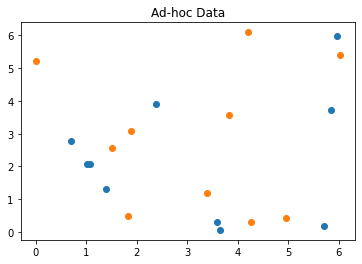

In [4]:
# Gap espacio en hiperrplano separa la data
sample_total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size\
    , test_size=testing_dataset_size,gap=0.3, n=feature_dim, plot_data=True)

In [5]:
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

{'A': 0, 'B': 1}


In [11]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm= QSVM(feature_map, training_input, test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, shots=shot, seed_simulator=random_seed,seed_transpiler= random_seed)
result = svm.run(quantum_instance)

MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install 'qiskit-aqua[cvx]''.  No module named 'scipy.sparse.linalg.eigen.arpack'; 'scipy.sparse.linalg.eigen' is not a package."

In [10]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}